In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("/Users/mayur/Desktop/Datasets/titanic/train.csv")
test_data = pd.read_csv("/Users/mayur/Desktop/Datasets/titanic/test.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
print(sum(women)/len(women))

0.7420382165605095


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
women = train_data.loc[train_data.Sex == 'male']["Survived"]
print(sum(women)/len(women))

0.18890814558058924


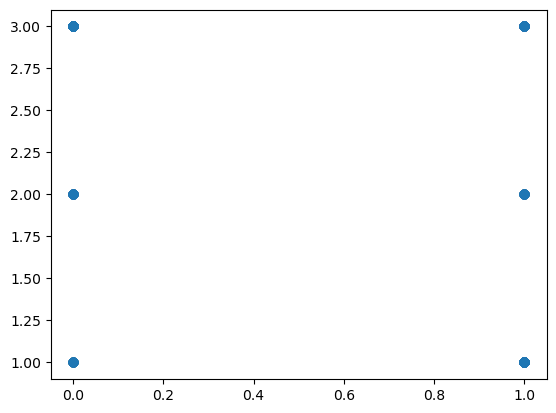

In [6]:
import matplotlib.pyplot as plt
plt.scatter(np.array(train_data['Survived']),np.array(train_data['Pclass']))


In [7]:
first_class = train_data.loc[(train_data.Pclass == 1) & (train_data.Sex == 'female')]['Survived']
print(sum(first_class)/len(first_class))

second_class = train_data.loc[(train_data.Pclass == 2) & (train_data.Sex == 'female')]["Survived"]
print(sum(second_class)/len(second_class))

third_class = train_data.loc[(train_data.Pclass == 3) & (train_data.Sex == 'female')]["Survived"]
print(sum(third_class)/len(third_class))





0.9680851063829787
0.9210526315789473
0.5


In [8]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier


y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/Users/mayur/Desktop/Datasets/titanic/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [9]:
### Random Forest
from sklearn.linear_model import LogisticRegression


y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/Users/mayur/Desktop/Datasets/titanic/submission_Logistic.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(X, y)
predictions = model.predict(X_test)
print(model.score(X, y))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/Users/mayur/Desktop/Datasets/titanic/submission_SVM.csv', index=False)
print("Your submission was successfully saved!")



0.8058361391694725
Your submission was successfully saved!
